# 0. Import All Libraries.

In [122]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import randint
from sklearn.externals import joblib

from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import os, glob

# 1. Import and Select Valid Data.

In [2]:
def load_data(path, sep, names):
    l = [pd.read_csv(filename, sep=sep, names=names) for filename in glob.glob(path)]
    return(pd.concat(l, axis=0))

In [3]:
def select_valid_data(df):
    
    # Drop Invalid categorical attributes.
    # Get names of indexes for which 'OCCUPANCY_STATUS' has value 9
    index_os = df[ df['OCCUPANCY_STATUS'] == '9' ].index
    # Delete these row indexes from dataFrame
    df.drop(index_os , inplace=True)

    # Get names of indexes for which 'CHANNEL' has value T or 9
    index_ch = df[ df['CHANNEL'] == 'T'].index + df[ df['CHANNEL'] == '9'].index
    # Delete these row indexes from dataFrame
    df.drop(index_ch , inplace=True)

    # Get names of indexes for which 'PROPERTY_TYPE' has value 99
    index_pt = df[ df['PROPERTY_TYPE'] == '99' ].index
    # Delete these row indexes from dataFrame
    df.drop(index_pt , inplace=True)

    # Get names of indexes for which 'LOAN_PURPOSE' has value R or 9
    index_lp = df[ df['LOAN_PURPOSE'] == 'R' ].index + df[ df['LOAN_PURPOSE'] == '9' ].index
    # Delete these row indexes from dataFrame
    df.drop(index_lp , inplace=True)
    
    # Drop Invalid numerical attributes.
    # Get names of indexes for which 'CREDIT_SCORE' has value 9999
    index_cs = df[ df['CREDIT_SCORE'] == 9999 ].index
    # Delete these row indexes from dataFrame
    df.drop(index_cs , inplace=True)

    # Get names of indexes for which 'MORTGAGE_INSURANCE_PERCENTAGE' has value 999
    index_mip = df[ df['MORTGAGE_INSURANCE_PERCENTAGE'] == 999 ].index
    # Delete these row indexes from dataFrame
    df.drop(index_mip , inplace=True)

    # Get names of indexes for which 'NUMBER_OF_UNITS' has value 99
    index_units = df[ df['NUMBER_OF_UNITS'] == 99 ].index
    # Delete these row indexes from dataFrame
    df.drop(index_units , inplace=True)

    # Get names of indexes for which 'ORIGINAL_COMBINED_LOAN-TO-VALUE' has value 999
    index_ocltv = df[ df['ORIGINAL_COMBINED_LOAN-TO-VALUE'] == 999 ].index
    # Delete these row indexes from dataFrame
    df.drop(index_ocltv , inplace=True)

    # Get names of indexes for which 'ORIGINAL_DEBT_TO_INCOME_RATIO' has value 999
    index_odir = df[ df['ORIGINAL_DEBT_TO_INCOME_RATIO'] == 999 ].index
    # Delete these row indexes from dataFrame
    df.drop(index_odir , inplace=True)

    # Get names of indexes for which 'ORIGINAL_LOAN-TO-VALUE' has value 999
    index_oltv = df[ df['ORIGINAL_LOAN-TO-VALUE'] == 999 ].index
    # Delete these row indexes from dataFrame
    df.drop(index_oltv , inplace=True)

    # Get names of indexes for which 'NUMBER_OF_BORROWERS' has value 99
    index_nob = df[ df['NUMBER_OF_BORROWERS'] == 99 ].index
    # Delete these row indexes from dataFrame
    df.drop(index_nob , inplace=True)
    
    # Drop Columns 'SUPER_CONFORMING_FLAG' and 'Pre_HARP_LOAN_SEQUENCE_NUMBER'
    df.drop(columns=['MATURITY_DATE', 'PRODUCT_TYPE', 'LOAN_SEQUENCE_NUMBER', 'SUPER_CONFORMING_FLAG', 
                     'Pre_HARP_LOAN_SEQUENCE_NUMBER'], inplace=True)
    
    return df

In [4]:
names = ['CREDIT_SCORE', 'FIRST_PAYMENT_DATE', 'FIRST_TIME_HOMEBUYER_FLAG', 'MATURITY_DATE', 'METROPOLITAN_STATISTICAL_AREA', 
 'MORTGAGE_INSURANCE_PERCENTAGE', 'NUMBER_OF_UNITS', 'OCCUPANCY_STATUS', 'ORIGINAL_COMBINED_LOAN-TO-VALUE', 
 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'ORIGINAL_UPB', 'ORIGINAL_LOAN-TO-VALUE', 'ORIGINAL_INTEREST_RATE', 
 'CHANNEL', 'PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG', 'PRODUCT_TYPE', 'PROPERTY_STATE', 'PROPERTY_TYPE', 'POSTAL_CODE', 
 'LOAN_SEQUENCE_NUMBER', 'LOAN_PURPOSE', 'ORIGINAL_LOAN_TERM', 'NUMBER_OF_BORROWERS', 'SELLER_NAME', 'SERVICER_NAME', 
 'SUPER_CONFORMING_FLAG', 'Pre_HARP_LOAN_SEQUENCE_NUMBER']

path = 'C:\\Users\\Abhilash\\Desktop\\Scikit-Learn\\SampleInputFiles\\sample_orig_*.txt'
sep='|'

In [5]:
df = load_data(path,sep,names)
df.shape

(150000, 27)

In [6]:
df = select_valid_data(df)
df.shape

(149919, 22)

### Data Structure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149919 entries, 0 to 49999
Data columns (total 22 columns):
CREDIT_SCORE                              149919 non-null int64
FIRST_PAYMENT_DATE                        149919 non-null int64
FIRST_TIME_HOMEBUYER_FLAG                 149919 non-null object
METROPOLITAN_STATISTICAL_AREA             135454 non-null float64
MORTGAGE_INSURANCE_PERCENTAGE             149919 non-null int64
NUMBER_OF_UNITS                           149919 non-null int64
OCCUPANCY_STATUS                          149919 non-null object
ORIGINAL_COMBINED_LOAN-TO-VALUE           149919 non-null int64
ORIGINAL_DEBT_TO_INCOME_RATIO             149919 non-null int64
ORIGINAL_UPB                              149919 non-null int64
ORIGINAL_LOAN-TO-VALUE                    149919 non-null int64
ORIGINAL_INTEREST_RATE                    149919 non-null float64
CHANNEL                                   149919 non-null object
PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG    149850 no

In [8]:
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN-TO-VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,...,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME
0,703,201503,9,41180.0,0,1,P,67,38,116000,...,R,N,IL,SF,62600,N,180,1,Other sellers,Other servicers
1,670,201504,9,11460.0,12,1,P,90,33,297000,...,R,N,MI,SF,48100,N,180,2,Other sellers,Other servicers
2,675,201503,9,49660.0,0,1,P,50,49,88000,...,R,N,OH,SF,44400,N,180,2,Other sellers,NATIONSTARMTGELLCDBA
3,661,201503,9,NaN,0,1,P,71,26,57000,...,R,N,KY,SF,41600,C,120,2,Other sellers,NATIONSTARMTGELLCDBA
4,727,201505,9,NaN,0,1,P,80,39,46000,...,R,N,OK,SF,73000,C,180,1,Other sellers,Other servicers


# 3. Data Analysis and Visualization.

### Define  Attributes

In [9]:
date_cols = ['FIRST_PAYMENT_DATE']

categorical_cols = ['FIRST_TIME_HOMEBUYER_FLAG', 'METROPOLITAN_STATISTICAL_AREA', 'OCCUPANCY_STATUS', 'CHANNEL',
                    'PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG', 'PROPERTY_STATE', 'PROPERTY_TYPE', 'POSTAL_CODE', 
                    'LOAN_PURPOSE', 'SELLER_NAME', 'SERVICER_NAME']

numerical_cols = ['CREDIT_SCORE', 'MORTGAGE_INSURANCE_PERCENTAGE', 'NUMBER_OF_UNITS', 'ORIGINAL_COMBINED_LOAN-TO-VALUE',
                  'ORIGINAL_DEBT_TO_INCOME_RATIO', 'ORIGINAL_UPB', 'ORIGINAL_LOAN-TO-VALUE', 'ORIGINAL_LOAN_TERM', 
                  'NUMBER_OF_BORROWERS']

target_col = 'ORIGINAL_INTEREST_RATE'

## 3.1 Categorical Attributes

### Check All the categorical values.

In [126]:
def check_unique_values(data, cat_columns):
    for col in cat_columns:
        print("Value Counts of {} are {} {}".format(col, '\n', data[col].value_counts()))

In [127]:
def check_counts(df, cat_columns):
    for attribute in cat_columns:
        print(attribute)
        print(df[attribute].agg(['nunique','count','size']))

In [128]:
check_unique_values(df, categorical_cols)

Value Counts of FIRST_TIME_HOMEBUYER_FLAG are 
 9    85066
N    39557
Y    25296
Name: FIRST_TIME_HOMEBUYER_FLAG, dtype: int64
Value Counts of METROPOLITAN_STATISTICAL_AREA are 
 31084.0    4868
16974.0    4320
35614.0    3476
38060.0    3271
19740.0    3247
12060.0    3117
40140.0    2966
19124.0    2923
26420.0    2836
47894.0    2646
33460.0    2586
42644.0    2344
38900.0    2279
11244.0    2030
41740.0    2027
36084.0    1972
40900.0    1929
47664.0    1908
41180.0    1814
34980.0    1436
16740.0    1413
45300.0    1398
15764.0    1346
12420.0    1335
12580.0    1317
17140.0    1273
28140.0    1251
26900.0    1233
29820.0    1212
36740.0    1190
           ... 
37620.0      23
27180.0      22
19500.0      22
21060.0      22
24140.0      22
19140.0      21
48660.0      20
43420.0      20
21420.0      19
21820.0      19
22140.0      19
10780.0      17
45500.0      17
23460.0      16
47220.0      16
44940.0      15
27780.0      15
27060.0      14
13220.0      14
13020.0      14
14100

In [129]:
check_counts(df, categorical_cols)

FIRST_TIME_HOMEBUYER_FLAG
nunique         3
count      149919
size       149919
Name: FIRST_TIME_HOMEBUYER_FLAG, dtype: int64
METROPOLITAN_STATISTICAL_AREA
nunique       404
count      135454
size       149919
Name: METROPOLITAN_STATISTICAL_AREA, dtype: int64
OCCUPANCY_STATUS
nunique         3
count      149919
size       149919
Name: OCCUPANCY_STATUS, dtype: int64
CHANNEL
nunique         3
count      149919
size       149919
Name: CHANNEL, dtype: int64
PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG
nunique         1
count      149850
size       149919
Name: PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG, dtype: int64
PROPERTY_STATE
nunique        54
count      149919
size       149919
Name: PROPERTY_STATE, dtype: int64
PROPERTY_TYPE
nunique         5
count      149919
size       149919
Name: PROPERTY_TYPE, dtype: int64
POSTAL_CODE
nunique       885
count      149919
size       149919
Name: POSTAL_CODE, dtype: int64
LOAN_PURPOSE
nunique         3
count      149919
size       149919
Name: LOAN_PURPOSE,

### Categorical Relationship Plots

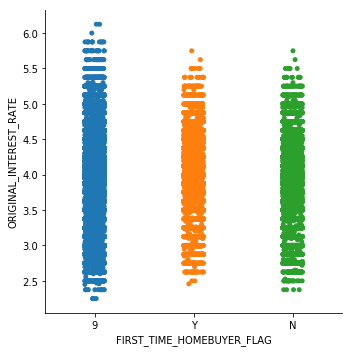

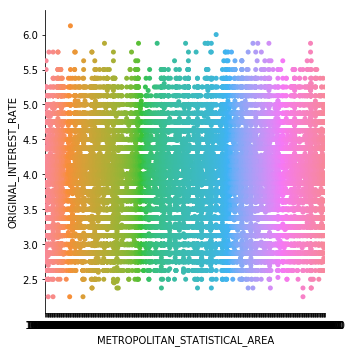

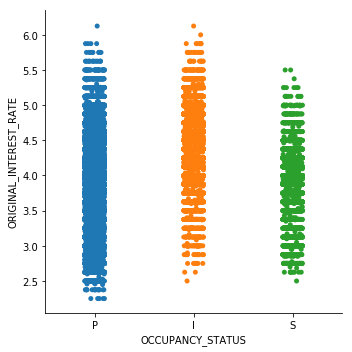

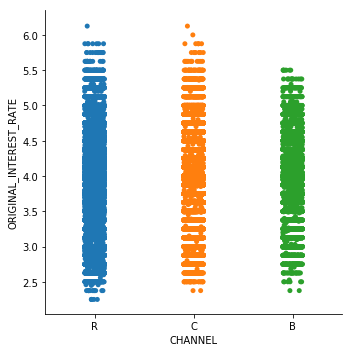

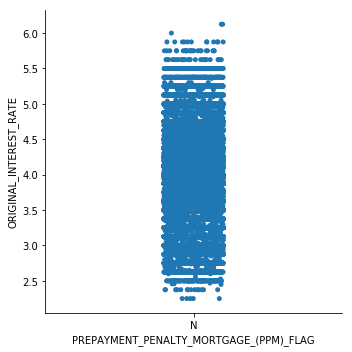

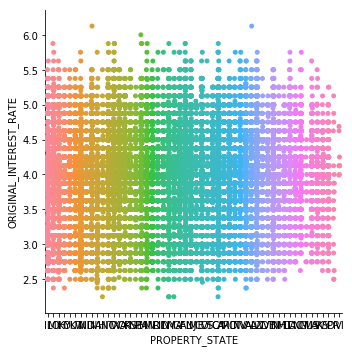

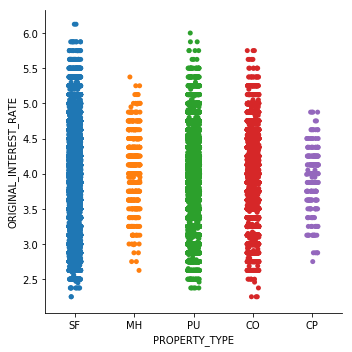

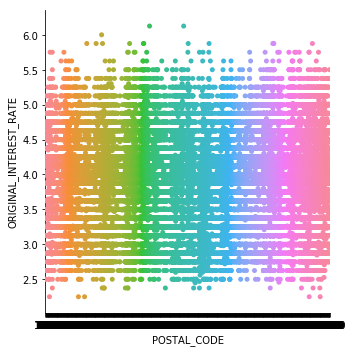

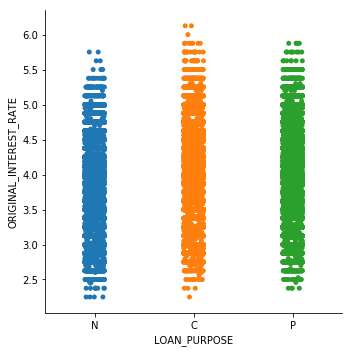

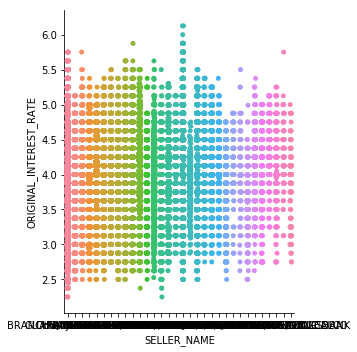

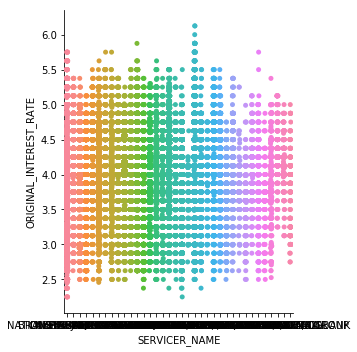

In [130]:
for col in categorical_cols:
    sns.catplot(x=col, y=target_col, data=df, kind='strip')

### Categorical Distribution Plots

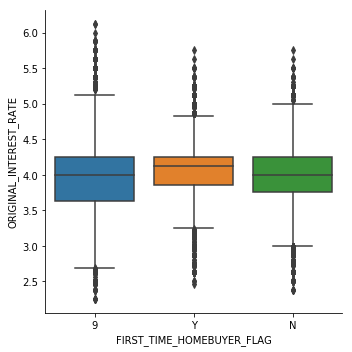

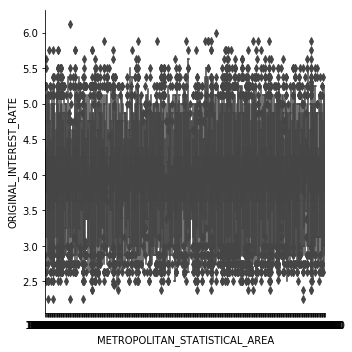

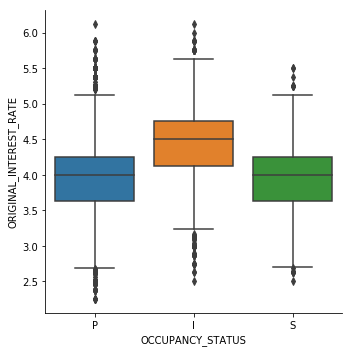

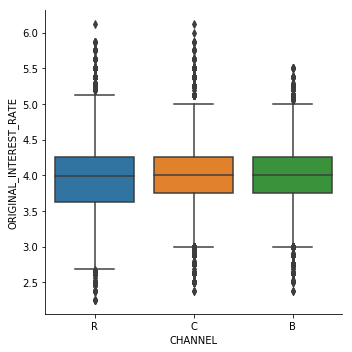

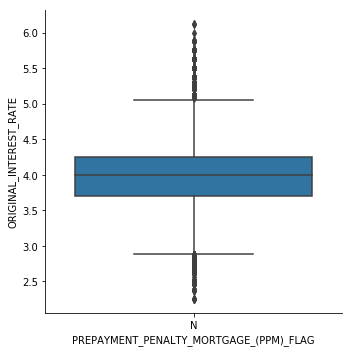

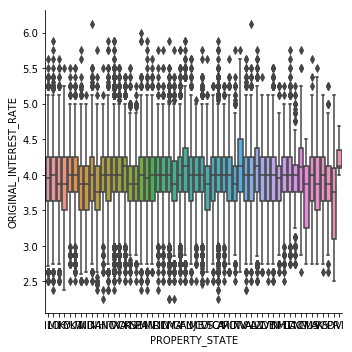

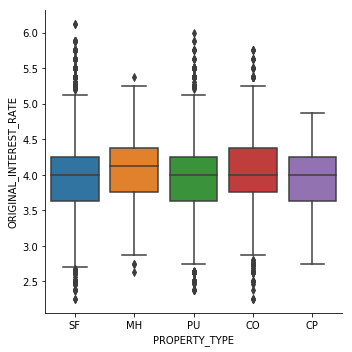

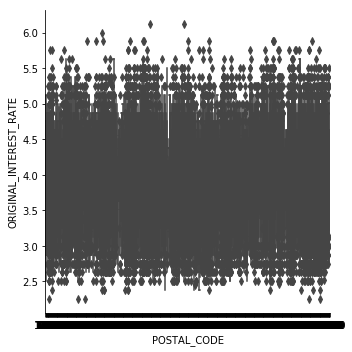

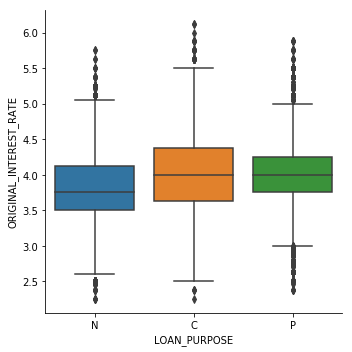

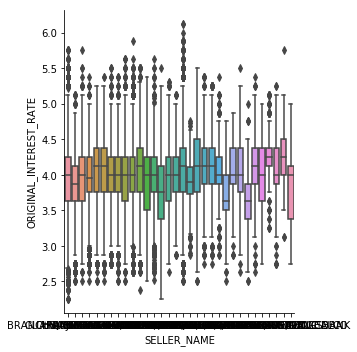

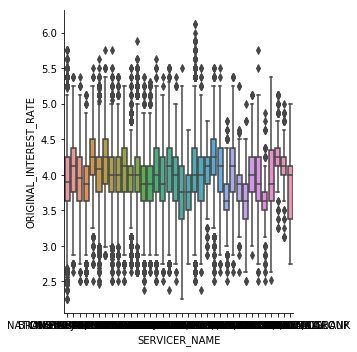

In [131]:
for col in categorical_cols:
    sns.catplot(x=col, y=target_col, kind='box', data=df)

### Categorical Comparison Plots

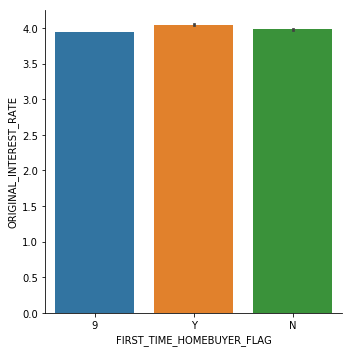

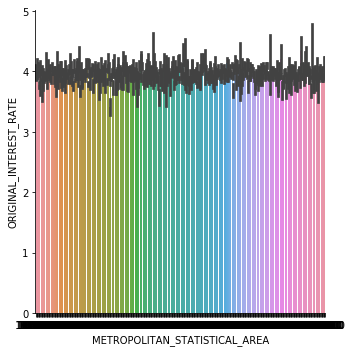

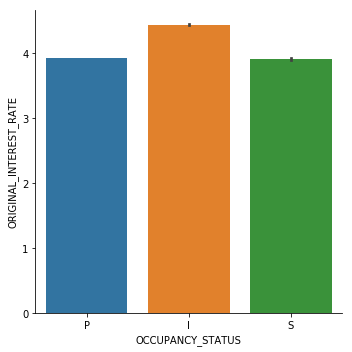

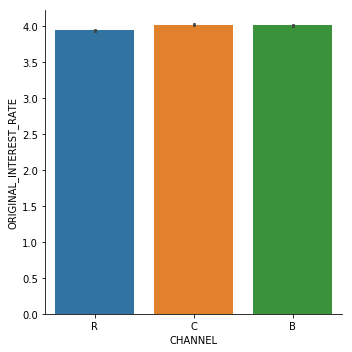

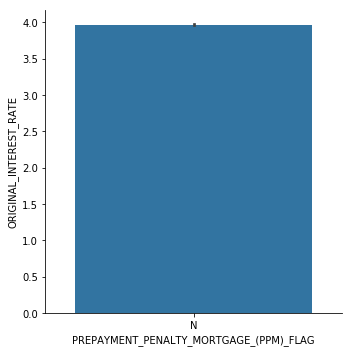

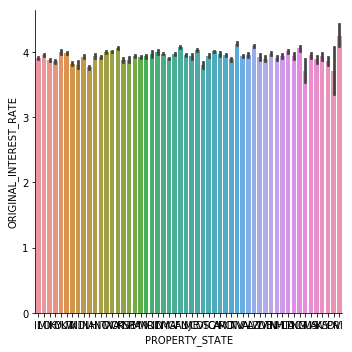

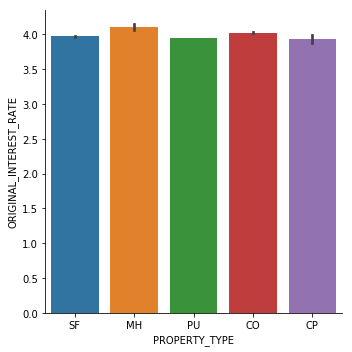

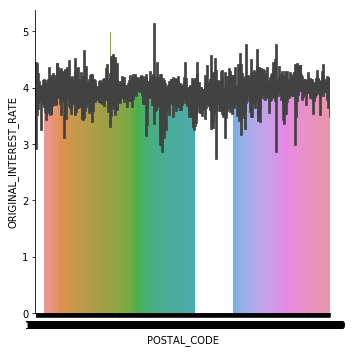

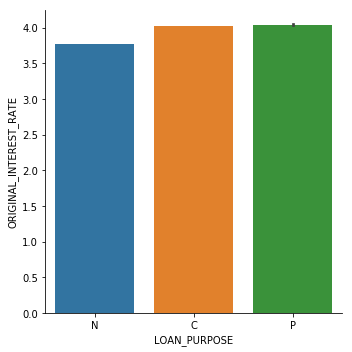

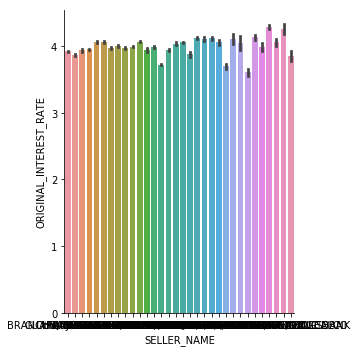

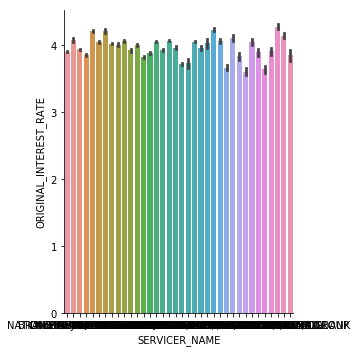

In [132]:
for col in categorical_cols:
    sns.catplot(x=col, y=target_col, kind='bar', data=df)

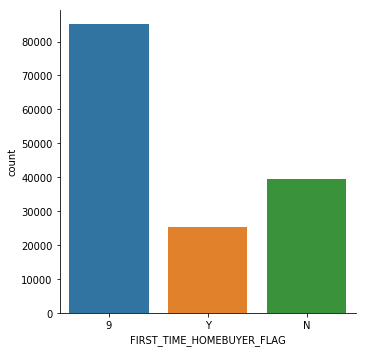

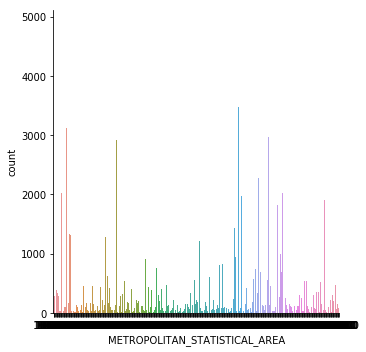

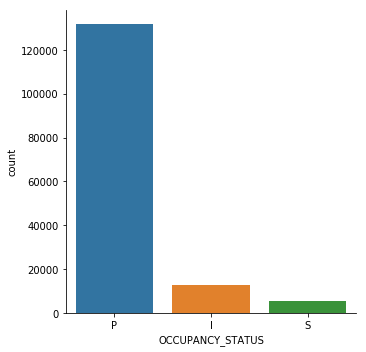

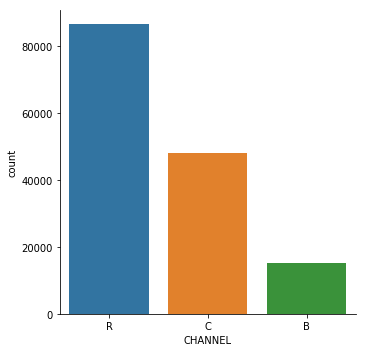

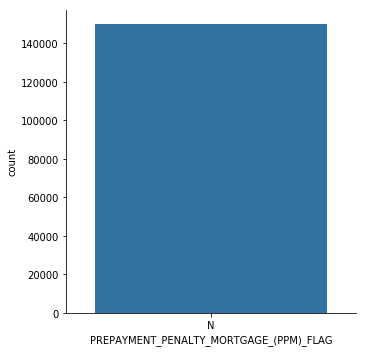

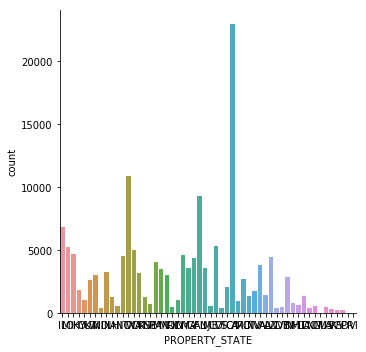

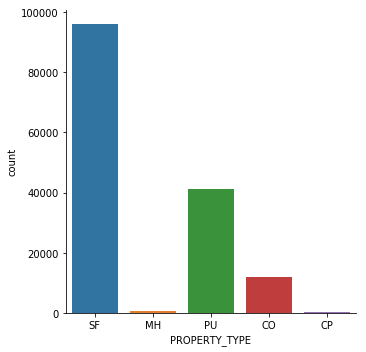

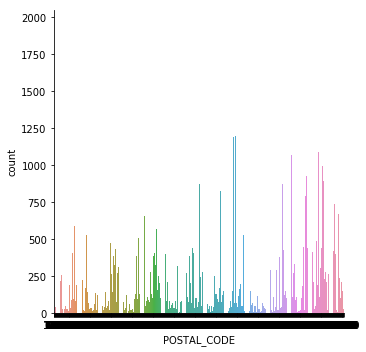

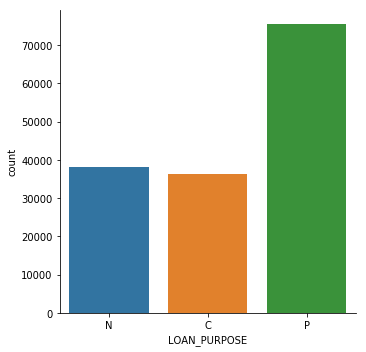

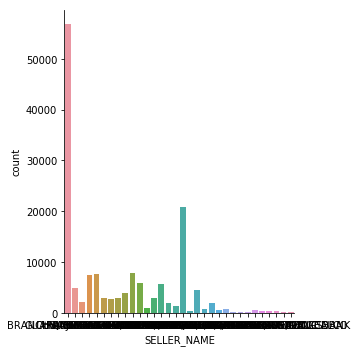

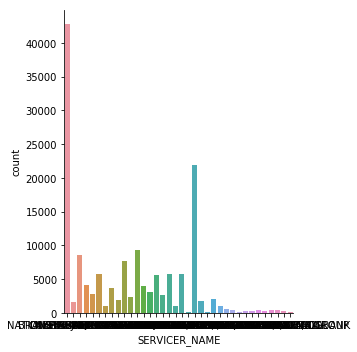

In [145]:
for col in categorical_cols:
    sns.catplot(x=col, kind='count', data=df)

## 3.2 Numerical Attributes

In [133]:
scatter_cols = numerical_cols + [target_col]

### Summary of all numerical variables

In [134]:
df[scatter_cols].describe()

,CREDIT_SCORE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN-TO-VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN-TO-VALUE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,ORIGINAL_INTEREST_RATE
count,149919.000000,149919.000000,149919.000000,149919.000000,149919.000000,149919.000000,149919.000000,149919.000000,149919.000000,149919.000000
mean,749.794716,6.369406,1.032964,74.056470,34.314930,234757.735844,73.612137,320.051254,1.506120,3.969035
std,44.912567,11.492886,0.246821,16.480894,9.408427,119774.341275,16.552044,73.197889,0.499964,0.481315
min,549.000000,0.000000,1.000000,6.000000,1.000000,12000.000000,6.000000,96.000000,1.000000,2.250000
25%,718.000000,0.000000,1.000000,66.000000,28.000000,142500.000000,66.000000,360.000000,1.000000,3.700000
50%,758.000000,0.000000,1.000000,79.000000,35.000000,214000.000000,78.000000,360.000000,2.000000,4.000000
75%,787.000000,6.000000,1.000000,85.000000,42.000000,310000.000000,82.000000,360.000000,2.000000,4.250000
max,839.000000,37.000000,4.000000,100.000000,50.000000,968000.000000,97.000000,527.000000,2.000000,6.125000


### Numerical Relationship Plots

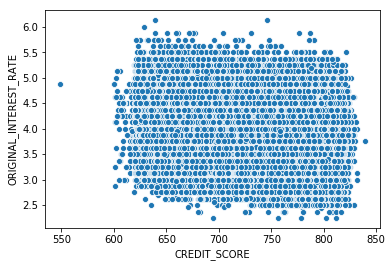

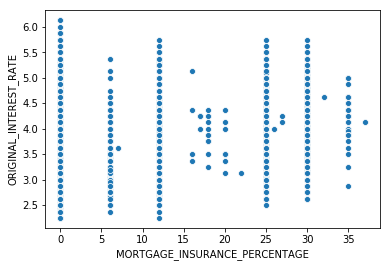

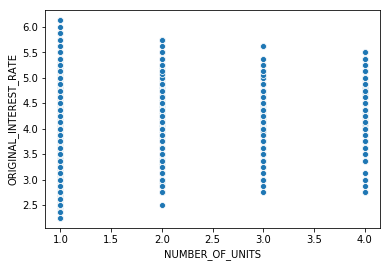

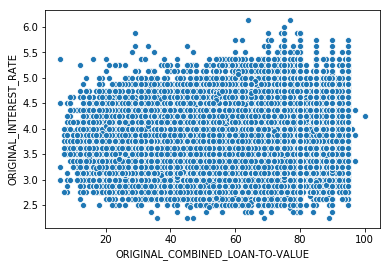

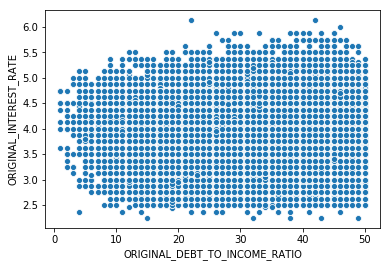

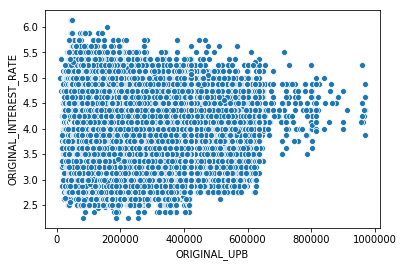

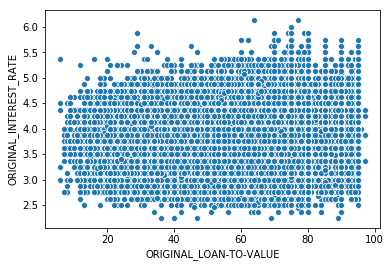

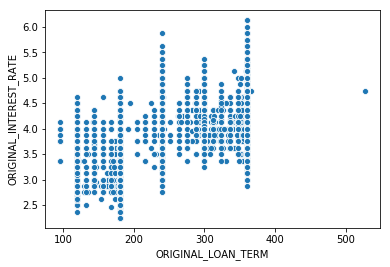

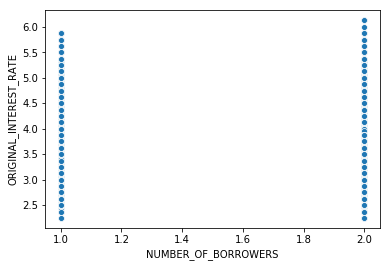

In [143]:
for col in numerical_cols:
    sns.scatterplot(x=col, y=target_col, data=df)
    plt.show()

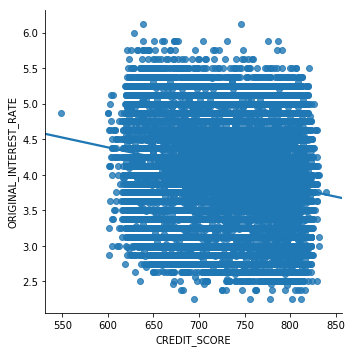

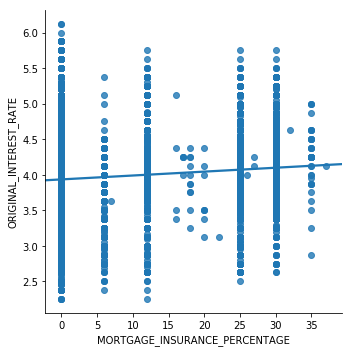

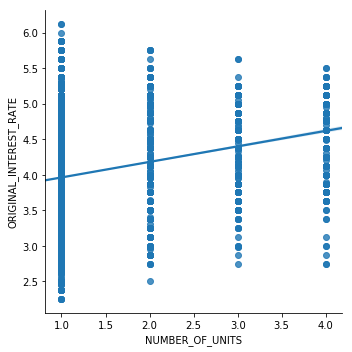

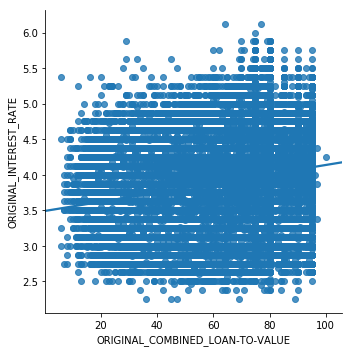

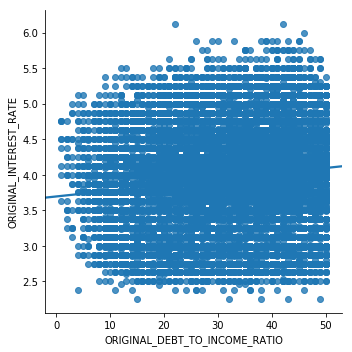

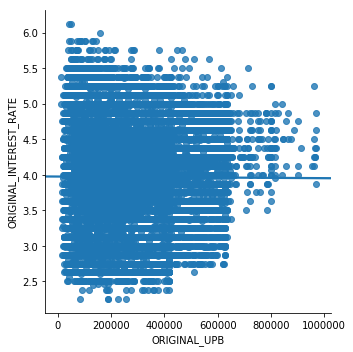

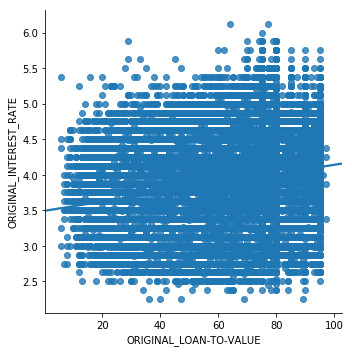

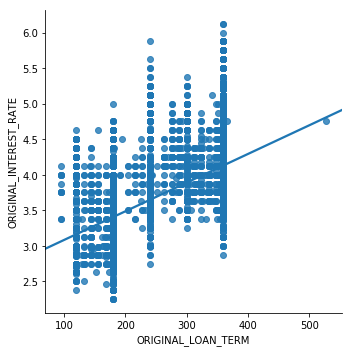

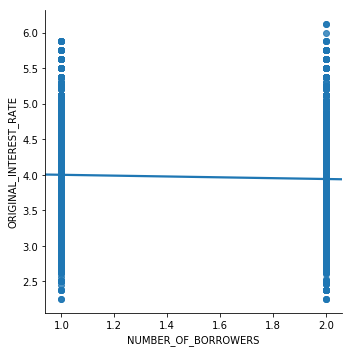

In [136]:
for col in numerical_cols:
    sns.lmplot(x=col, y=target_col, data=df)

### Numerical Distribution Plots

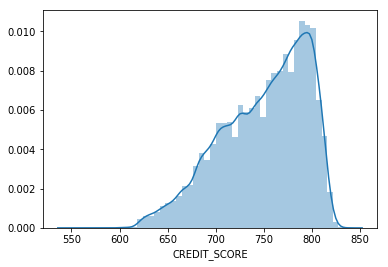

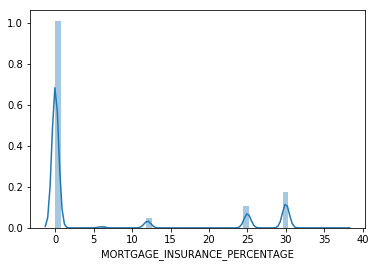

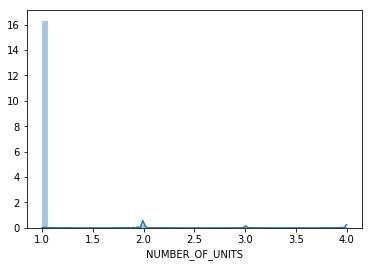

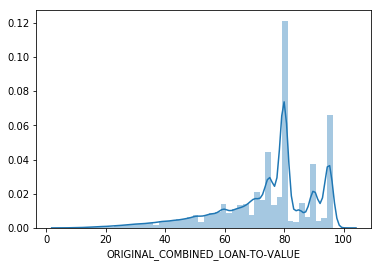

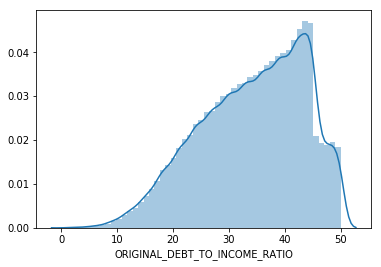

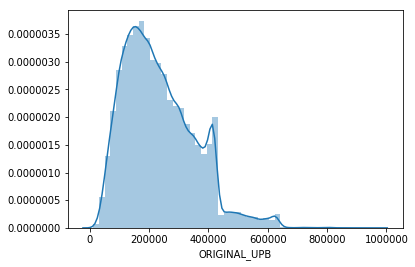

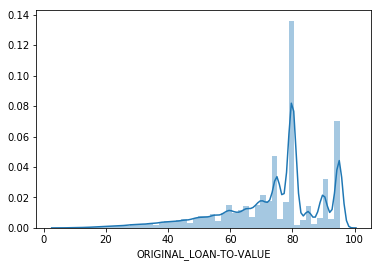

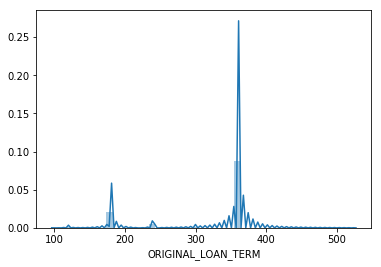

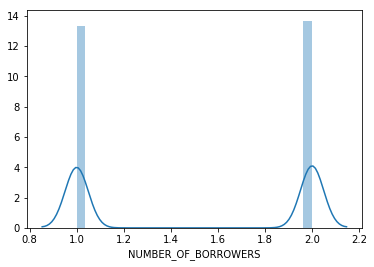

In [142]:
for col in numerical_cols:
    sns.distplot(df[col])
    plt.show()

### Numerical Correlation Plots

In [138]:
corr_matrix = df[scatter_cols].corr()

In [139]:
corr_matrix['ORIGINAL_INTEREST_RATE'].sort_values(ascending=False)

ORIGINAL_INTEREST_RATE             1.000000
ORIGINAL_LOAN_TERM                 0.613677
ORIGINAL_LOAN-TO-VALUE             0.223155
ORIGINAL_COMBINED_LOAN-TO-VALUE    0.221746
ORIGINAL_DEBT_TO_INCOME_RATIO      0.156718
MORTGAGE_INSURANCE_PERCENTAGE      0.130881
NUMBER_OF_UNITS                    0.112022
ORIGINAL_UPB                      -0.005708
NUMBER_OF_BORROWERS               -0.061538
CREDIT_SCORE                      -0.258783
Name: ORIGINAL_INTEREST_RATE, dtype: float64

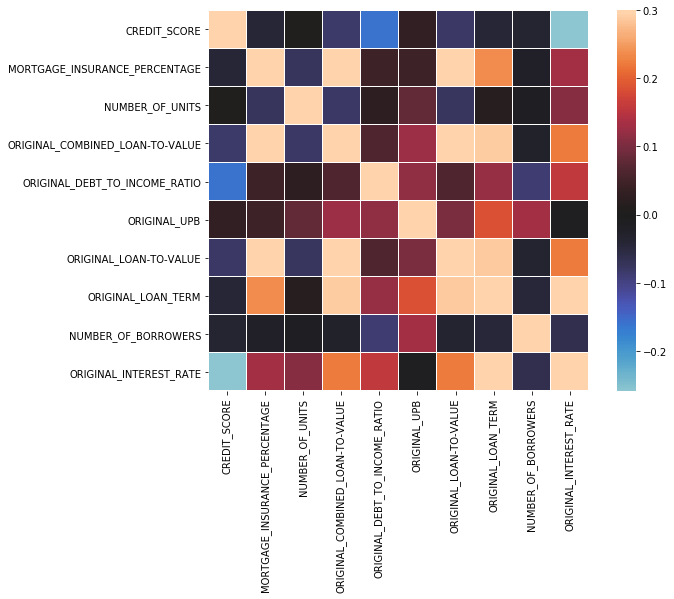

In [140]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, vmax=.3, center=0, square=True, linewidths=.5)

## 3.3 Visualize distribution using lati and longi from three digit POSTAL_CODE.

#### Visualization done in separate script. Along with visualization, Postal_Codes are also clustered for ML process.

## 3.4 Split data into Train and Test set.

In [27]:
train_random, test_random = train_test_split(df, test_size=0.2, random_state=42)

In [87]:
train_random.shape

(119935, 22)

In [28]:
train_random = train_random.reset_index(drop=True)

In [29]:
test_random = test_random.reset_index(drop=True)

In [30]:
train_random.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN-TO-VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,...,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME
0,770,201705,Y,47894.0,30,1,P,95,24,375000,...,C,N,VA,SF,22100,P,360,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA"
1,760,201612,N,NaN,25,1,P,90,40,346000,...,R,N,OR,SF,97000,P,360,1,Other sellers,Other servicers
2,699,201702,N,20260.0,0,1,P,80,14,48000,...,R,N,WI,SF,54800,P,240,1,Other sellers,Other servicers
3,763,201604,Y,30780.0,30,1,P,95,36,157000,...,C,N,AR,SF,72100,P,360,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA"
4,742,201612,N,41740.0,0,1,P,80,49,404000,...,C,N,CA,PU,92000,P,180,2,AMERIHOMEMTGECOMPANY,AMERIHOMEMTGECOMPANY


In [31]:
train_random.shape

(119935, 22)

In [32]:
train_random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119935 entries, 0 to 119934
Data columns (total 22 columns):
CREDIT_SCORE                              119935 non-null int64
FIRST_PAYMENT_DATE                        119935 non-null int64
FIRST_TIME_HOMEBUYER_FLAG                 119935 non-null object
METROPOLITAN_STATISTICAL_AREA             108389 non-null float64
MORTGAGE_INSURANCE_PERCENTAGE             119935 non-null int64
NUMBER_OF_UNITS                           119935 non-null int64
OCCUPANCY_STATUS                          119935 non-null object
ORIGINAL_COMBINED_LOAN-TO-VALUE           119935 non-null int64
ORIGINAL_DEBT_TO_INCOME_RATIO             119935 non-null int64
ORIGINAL_UPB                              119935 non-null int64
ORIGINAL_LOAN-TO-VALUE                    119935 non-null int64
ORIGINAL_INTEREST_RATE                    119935 non-null float64
CHANNEL                                   119935 non-null object
PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG    119880 n

# 4. Data Preparation.

## 4.0.0 Set Train, Train_Label, num_cols, cat_cols and Index to be used in pipelines.

In [33]:
train = train_random.drop('ORIGINAL_INTEREST_RATE', axis=1) # drop labels for training set
train_label = train_random['ORIGINAL_INTEREST_RATE']

In [34]:
num_cols = ['CREDIT_SCORE', 'MORTGAGE_INSURANCE_PERCENTAGE', 'NUMBER_OF_UNITS', 'ORIGINAL_COMBINED_LOAN-TO-VALUE',
            'ORIGINAL_DEBT_TO_INCOME_RATIO', 'ORIGINAL_UPB', 'ORIGINAL_LOAN-TO-VALUE', 'ORIGINAL_LOAN_TERM', 
            'NUMBER_OF_BORROWERS']

cat_cols = ['FIRST_PAYMENT_DATE', 'FIRST_TIME_HOMEBUYER_FLAG', 'METROPOLITAN_STATISTICAL_AREA', 'OCCUPANCY_STATUS', 'CHANNEL',
            'PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG', 'PROPERTY_STATE', 'PROPERTY_TYPE', 'POSTAL_CODE', 
            'LOAN_PURPOSE', 'SELLER_NAME', 'SERVICER_NAME']

In [35]:
dt_ix, ppm_ix, msa_ix, postal_ix = [cat_cols.index(col) for col in ['FIRST_PAYMENT_DATE', 
                                                                    'PREPAYMENT_PENALTY_MORTGAGE_(PPM)_FLAG',
                                                                    'METROPOLITAN_STATISTICAL_AREA', 'POSTAL_CODE']]

## 4.0.1 Create dictionary of Pincodes and Clusters.

In [36]:
def create_dict(df):
    post_code_clusters={}
    for index, row in df.iterrows():
        postal_code = row['POSTAL_CODE']
        postal_cluster = row['Cluster Labels']
    
        if postal_code not in post_code_clusters:
            post_code_clusters[postal_code]={
                'LABEL':postal_cluster
            }
    return post_code_clusters

In [37]:
postal_clusters_df = pd.read_csv('clustered_us.csv')
postal_cluster_dict = create_dict(postal_clusters_df)

In [125]:
joblib.dump(postal_cluster_dict, "postal_cluster_dict.pkl")

['postal_cluster_dict.pkl']

## 4.1 Prepare Numerical variables.

In [38]:
numerical_pipeline = Pipeline([
    ('Std_Scaler', StandardScaler())
])

## 4.3 Preparing Categorical variables.

In [39]:
class Impute_Attributes(BaseEstimator, TransformerMixin):
    def __init__(self, impute_date=True, impute_ppm=True, impute_msa=True, impute_postal=True):
        self.impute_date = impute_date
        self.impute_ppm = impute_ppm
        self.impute_msa = impute_msa
        self.impute_postal = impute_postal
        
    def fit(self, Z, y=None):
        return self # Do Nothing.
    
    def transform(self, Z, y=None):
        
        X = Z.values
        
        if self.impute_date:
            X[:,dt_ix] = [x%100 for x in X[:,dt_ix]]
        
        if self.impute_ppm:
            X[:,ppm_ix] = ['Y' if x is not 'N' else 'N' for x in X[:,ppm_ix]]
            
        if self.impute_msa:
            X[:, msa_ix] = [1 if x >= 0 else 0 for x in X[:, msa_ix]]
            
        if self.impute_postal:
            X[:, postal_ix] = [postal_cluster_dict[x]['LABEL'] if x in postal_cluster_dict
                               else 10 for x in X[:, postal_ix]]        
        return X

In [40]:
categorical_pipeline = Pipeline([
    ('Imputer', Impute_Attributes()),
    ('OneHotEncoder', OneHotEncoder(sparse=False)),
])

## 4.4 Full Pipeline.

In [41]:
full_pipeline = ColumnTransformer([
    ('Numerical', numerical_pipeline, num_cols),
    ('Categorical', categorical_pipeline, cat_cols),
])

In [42]:
X_train  = full_pipeline.fit_transform(train)
y_train = train_label

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
print('x_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))

x_train shape:(119935, 175)
y_train shape:(119935,)


# 5. Try Different Models

In [44]:
models = []
results = []
names = []

models.append(('Lin_reg', LinearRegression()))
models.append(('Tree_reg', DecisionTreeRegressor()))
models.append(('Forest_reg', RandomForestRegressor(n_estimators=10)))
# models.append(('SVM_reg', SVR(gamma='auto')))
# models.append(('SGD_reg', SGDRegressor()))
# models.append(('KNN_reg', KNeighborsRegressor()))
# models.append(('Naive_reg', GaussianNB()))
# models.append(('XGBoost_reg', GradientBoostingRegressor()))

## 5.1 Training and Evaluation on Train Set.

In [45]:
some_data = X_train[:5]
some_label = y_train[:5]

In [46]:
for name, model in models:
    model.fit(X_train, y_train)
    some_pred = model.predict(some_data)
    mse = mean_squared_error(some_label, some_pred)
    rmse = np.sqrt(mse)
    print('Model : {} Model RMSE: {}'.format(name, rmse))

Model : Lin_reg Model RMSE: 0.39423124431333
Model : Tree_reg Model RMSE: 0.0
Model : Forest_reg Model RMSE: 0.12130622407774462


## 5.2 Training and Evaluation using Cross Fold Validation

In [47]:
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=4)
    rmse_scores = np.sqrt(-scores)
    print(f'{name} Model Mean Score is {rmse_scores.mean()} and STD is {rmse_scores.std()}')

Lin_reg Model Mean Score is 144299889.8057299 and STD is 325357577.15052766
Tree_reg Model Mean Score is 0.3998569715451879 and STD is 0.0015549762362522964
Forest_reg Model Mean Score is 0.296885567742785 and STD is 0.0015613758928984484


# 6. Model, Hyperparameters and Feature Selection.

## 6.1 Select a Model.

In [55]:
model = xgb.XGBRegressor(booster='gbtree',
                         verbosity = 1,
                         learning_rate=0.1,
                         gamma=0,
                         max_depth=5,
                         min_child_weight=1,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         reg_lambda=1,
                         objective= 'reg:squarederror',
                         n_estimators=20)

## 6.2 Hyperparameter Tuning.

#### 6.2.1 Tune max_depth + min_child_weight.

In [56]:
param_dist = {'max_depth':range(3,10,2),
              'min_child_weight':range(1,6,2)}

In [57]:
parm_selector = RandomizedSearchCV(model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=2)

In [58]:
parm_selector.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.8, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [60]:
parm_selector.best_params_

{'min_child_weight': 5, 'max_depth': 9}

#### 6.2.2 Tune gamma.

In [61]:
model_2 = xgb.XGBRegressor(booster='gbtree',
                           verbosity = 1,
                           learning_rate=0.1,
                           gamma=0,
                           max_depth=9,           # Value imputed from above run.
                           min_child_weight=5,    # Value imputed from above run.
                           subsample=0.8,
                           colsample_bytree=0.8,
                           reg_lambda=1,
                           objective= 'reg:squarederror',
                           n_estimators=20)

In [62]:
param_dist = {'gamma':[i/10.0 for i in range(0,5)]}

In [63]:
parm_selector = RandomizedSearchCV(model_2,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=2)

In [64]:
parm_selector.fit(X_train, y_train)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.8, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [65]:
parm_selector.best_params_

{'gamma': 0.3}

#### 6.2.3 Tune subsample and colsample_bytree.

In [67]:
model_3 = xgb.XGBRegressor(booster='gbtree',
                           verbosity = 1,
                           learning_rate=0.1,
                           gamma=0.3, # Value imputed from above run.
                           max_depth=9, # Value imputed from above run.
                           min_child_weight=5, # Value imputed from above run.
                           subsample=0.8,
                           colsample_bytree=0.8,
                           reg_lambda=1,
                           objective= 'reg:squarederror',
                           n_estimators=20)

In [68]:
param_dist = {'subsample':[i/10.0 for i in range(6,10)],
             'colsample_bytree':[i/10.0 for i in range(6,10)]}

In [69]:
parm_selector = RandomizedSearchCV(model_3,
                                   param_distributions=param_dist,
                                   n_iter=17,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=3)

In [70]:
parm_selector.fit(X_train, y_train)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 16 is smaller than n_iter=17. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.8, verbosity=1),
          fit_params=None, iid='warn', n_iter=17, n_jobs=3,
          param_distributions={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [71]:
parm_selector.best_params_

{'subsample': 0.9, 'colsample_bytree': 0.9}

#### 6.2.4 Tune Regularization Parameters.

In [72]:
model_4 = xgb.XGBRegressor(booster='gbtree',
                           verbosity = 1,
                           learning_rate=0.1,
                           gamma=0.3, # Value imputed from above run.
                           max_depth=9, # Value imputed from above run.
                           min_child_weight=5, # Value imputed from above run.
                           subsample=0.9, # Value imputed from above run.
                           colsample_bytree=0.9, # Value imputed from above run.
                           reg_lambda=1,
                           objective= 'reg:squarederror',
                           n_estimators=20)

In [73]:
param_dist = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

In [74]:
parm_selector = RandomizedSearchCV(model_4,
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=2)

In [75]:
parm_selector.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.9, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=2,
          param_distributions={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [76]:
parm_selector.best_params_

{'reg_alpha': 0.01}

#### 6.2.5 Reducing Learning Rate.

In [77]:
model_5 = xgb.XGBRegressor(booster='gbtree',
                           verbosity = 1,
                           learning_rate=0.1,
                           gamma=0.3, # Value imputed from above run.
                           max_depth=9, # Value imputed from above run.
                           min_child_weight=5, # Value imputed from above run.
                           subsample=0.9, # Value imputed from above run.
                           colsample_bytree=0.9, # Value imputed from above run.
                           reg_alpha=0.01, # Value imputed from above run.
                           reg_lambda=1,
                           objective= 'reg:squarederror',
                           n_estimators=20)

In [78]:
param_dist = {'learning_rate':[0.1, 0.01, 0.001, .0001]}

In [79]:
parm_selector = RandomizedSearchCV(model_5,
                                   param_distributions=param_dist,
                                   n_iter=4,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=2)

In [80]:
parm_selector.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.9, verbosity=1),
          fit_params=None, iid='warn', n_iter=4, n_jobs=2,
          param_distributions={'learning_rate': [0.1, 0.01, 0.001, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [81]:
parm_selector.best_params_

{'learning_rate': 0.1}

## 6.3 Feature Importance using Random-Forest.

### 6.1 Calculate Feature Importances.

In [83]:
feauture_model = RandomForestRegressor()

In [84]:
param_dist = {'n_estimators': randint(low=1, high=200), 'max_features': randint(low=1, high=50)}

In [85]:
feature_selector = RandomizedSearchCV(feauture_model,
                                      param_distributions=param_dist,
                                      n_iter=10,
                                      cv=5,
                                      scoring='neg_mean_squared_error',
                                      n_jobs=2)

In [86]:
feature_selector.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC91AE7B70>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC91AE0160>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [89]:
feature_selector.best_params_

{'max_features': 34, 'n_estimators': 197}

In [91]:
feature_importances = feature_selector.best_estimator_.feature_importances_
feature_importances

array([9.94935247e-02, 7.00595116e-03, 4.08821157e-03, 3.58154448e-02,
       3.45912488e-02, 5.59614209e-02, 3.73224953e-02, 3.33549806e-01,
       6.47282455e-03, 3.98572903e-03, 3.29091714e-03, 5.62164356e-03,
       3.92522128e-03, 3.79716426e-03, 3.64763695e-03, 3.28821777e-03,
       3.02328077e-03, 3.28160253e-03, 4.02443297e-03, 3.76290567e-03,
       4.36750787e-03, 4.24218141e-03, 3.18325823e-03, 2.35766266e-03,
       2.86185959e-03, 2.91034202e-03, 5.31181739e-02, 2.49429970e-02,
       6.30276073e-03, 2.91262103e-03, 4.21897151e-03, 5.21812606e-03,
       1.13789235e-04, 1.12524263e-04, 2.56105006e-04, 9.69477865e-04,
       7.61738321e-04, 2.11364285e-03, 4.39142391e-03, 2.01971090e-03,
       8.63157593e-04, 1.79522517e-04, 3.15246481e-04, 3.70054626e-03,
       1.93794981e-03, 1.01833581e-04, 4.38345162e-04, 1.40986994e-03,
       5.94220878e-04, 2.44944748e-03, 1.62635793e-03, 8.74317215e-04,
       1.06241264e-03, 8.60804442e-04, 1.61948393e-03, 1.30877600e-03,
      

In [92]:
len(feature_importances)

175

### 6.2 Associate all output Feature Names with Feature Importances.

In [93]:
x = full_pipeline
y = x.transformers_[1][1].named_steps['OneHotEncoder'].get_feature_names
pipeline_one_hot_cols = list(y(cat_cols))

In [94]:
pipeline_op_attributes = num_cols + pipeline_one_hot_cols
sorted(zip(feature_importances, pipeline_op_attributes), reverse=True)

[(0.3335498058370323, 'ORIGINAL_LOAN_TERM'),
 (0.09949352473200976, 'CREDIT_SCORE'),
 (0.055961420916616704, 'ORIGINAL_UPB'),
 (0.05311817389568006, 'OCCUPANCY_STATUS_I'),
 (0.03732249530356276, 'ORIGINAL_LOAN-TO-VALUE'),
 (0.035815444847506046, 'ORIGINAL_COMBINED_LOAN-TO-VALUE'),
 (0.03459124884208386, 'ORIGINAL_DEBT_TO_INCOME_RATIO'),
 (0.02494299703998584, 'OCCUPANCY_STATUS_P'),
 (0.02004291094984334, 'LOAN_PURPOSE_N'),
 (0.011862720630667815, 'LOAN_PURPOSE_C'),
 (0.007005951156612935, 'MORTGAGE_INSURANCE_PERCENTAGE'),
 (0.006472824548834004, 'NUMBER_OF_BORROWERS'),
 (0.006302760726773238, 'OCCUPANCY_STATUS_S'),
 (0.006042617845777174, 'SERVICER_NAME_Other servicers'),
 (0.005922067256025891, 'SELLER_NAME_Other sellers'),
 (0.005621643559997411, 'FIRST_PAYMENT_DATE_3'),
 (0.0052878818395419155, 'LOAN_PURPOSE_P'),
 (0.00521812605834172, 'CHANNEL_R'),
 (0.004830581735456251, 'POSTAL_CODE_7'),
 (0.004815063250927461, 'PROPERTY_TYPE_SF'),
 (0.004391423910628288, 'PROPERTY_STATE_CA'),
 (

### 6.3 Class to select number of Features to be included in pipeline.

In [95]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

### 6.4 Final Pipeline and Feature Selection.

In [101]:
final_model = xgb.XGBRegressor(booster='gbtree',
                               verbosity = 1,
                               learning_rate=0.1, # Value imputed from model-tuning run.
                               gamma=0.3, # Value imputed from model-tuning run.
                               max_depth=9, # Value imputed from model-tuning run.
                               min_child_weight=5, # Value imputed from model-tuning run.
                               subsample=0.9, # Value imputed from model-tuning run.
                               colsample_bytree=0.9, # Value imputed from model-tuning run.
                               reg_alpha=0.01, # Value imputed from model-tuning run.
                               reg_lambda=1,
                               objective= 'reg:squarederror',
                               n_estimators=20)

In [102]:
k=10

In [103]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('gb_regression', final_model)
])

In [104]:
param_grid = [{'feature_selection__k': list(range(1, len(feature_importances) + 1))}]

grid_search = GridSearchCV(prepare_select_and_predict_pipeline,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=2)

In [106]:
grid_search.fit(train, train_label)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 15.9min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 57.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 121.5min
[Parallel(n_jobs=2)]: Done 875 out of 875 | elapsed: 144.2min finished
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhilash\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', Non

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Numerical', Pipeline(memory=None,
     steps=[('Std_Scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['CREDIT_SCORE', 'MORTGA...0.01, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.9, verbosity=1))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,...56, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}],
       pre_dispatch='2*n_jobs', refit=Tr

In [108]:
grid_search.best_params_

{'feature_selection__k': 155}

# 7. Final Model Training and Evaluation.

In [111]:
K=155

In [112]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('gb_regression', final_model)
])

In [113]:
prepare_select_and_predict_pipeline.fit(train, train_label)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhilash\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Abhilash\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Numerical', Pipeline(memory=None,
     steps=[('Std_Scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['CREDIT_SCORE', 'MORTGA...0.01, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.9, verbosity=1))])

In [114]:
X_test = test_random.drop('ORIGINAL_INTEREST_RATE', axis=1) # drop labels for training set
y_test = test_random['ORIGINAL_INTEREST_RATE']

In [116]:
y_predict = prepare_select_and_predict_pipeline.predict(X_test)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [117]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [118]:
rmse

0.5179817523195043

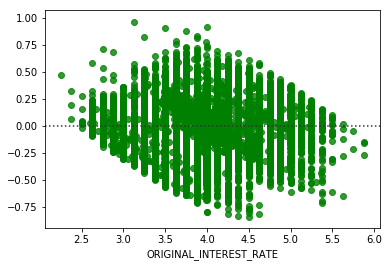

In [119]:
sns.residplot(y_test, y_predict, color="g")

In [120]:
X = df.drop('ORIGINAL_INTEREST_RATE', axis=1) # drop labels for training set
y = df['ORIGINAL_INTEREST_RATE']

In [121]:
prepare_select_and_predict_pipeline.fit(X, y)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhilash\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Abhilash\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Numerical', Pipeline(memory=None,
     steps=[('Std_Scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['CREDIT_SCORE', 'MORTGA...0.01, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.9, verbosity=1))])

In [123]:
rate_model = prepare_select_and_predict_pipeline

In [124]:
joblib.dump(rate_model, "rate_model.pkl")

['rate_model.pkl']